<a href="https://colab.research.google.com/github/nghitct/AlgorithmSupportedInductionPersonality/blob/main/TeamPersonality-AnalysisCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing ...

In [3]:
# importing library
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

# Loading and checking data

## Loading data and checking data size, variables' names

In [4]:
# importing data
dat1=pd.read_csv("Data 1 - full groups.csv")
dat2=pd.read_csv("Data 2 - full groups.csv")

In [5]:
# checking size of data
print(dat1.shape)
print(dat2.shape)

(636, 54)
(116, 54)


In [6]:
# printing columns' names of dat1 
for col in dat1.columns:
  print(col)

GroupID
emos_all_mean
extr_all_mean
open_all_mean
agree_all_mean
cons_all_mean
emos_all_sd
extr_all_sd
open_all_sd
agree_all_sd
cons_all_sd
emos_all_min
extr_all_min
open_all_min
agree_all_min
cons_all_min
emos_all_max
extr_all_max
open_all_max
agree_all_max
cons_all_max
gender_all_mean
gender_all_sd
size
performance
emos_exc_mean
extr_exc_mean
open_exc_mean
agree_exc_mean
cons_exc_mean
emos_exc_sd
extr_exc_sd
open_exc_sd
agree_exc_sd
cons_exc_sd
emos_exc_min
extr_exc_min
open_exc_min
agree_exc_min
cons_exc_min
emos_exc_max
extr_exc_max
open_exc_max
agree_exc_max
cons_exc_max
gender_exc_mean
gender_exc_sd
gender_leader
emos_leader
extr_leader
open_leader
agree_leader
cons_leader
size_all


In [7]:
# printing columns' names of dat2 
for col in dat2.columns:
  print(col)

teamid
neur_all_mean
extr_all_mean
open_all_mean
agree_all_mean
cons_all_mean
neur_all_sd
extr_all_sd
open_all_sd
agree_all_sd
cons_all_sd
neur_all_min
extr_all_min
open_all_min
agree_all_min
cons_all_min
neur_all_max
extr_all_max
open_all_max
agree_all_max
cons_all_max
size
performance
gender_all_mean
gender_all_sd
neur_exc_mean
extr_exc_mean
open_exc_mean
agree_exc_mean
cons_exc_mean
neur_exc_sd
extr_exc_sd
open_exc_sd
agree_exc_sd
cons_exc_sd
neur_exc_min
extr_exc_min
open_exc_min
agree_exc_min
cons_exc_min
neur_exc_max
extr_exc_max
open_exc_max
agree_exc_max
cons_exc_max
gender_exc_mean
gender_exc_sd
gender_leader
open_leader
cons_leader
extr_leader
agree_leader
neur_leader
size_all


## Descriptive Analysis

### Dependent Variable: Team Performance

Text(0.5, 1.0, 'Performance in Data 2')

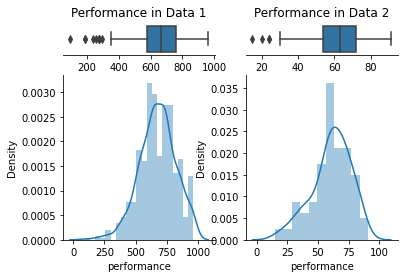

In [12]:
#load variables
x1=dat1['performance']
x2=dat2['performance']

#define subplots
f, axs = plt.subplots(2,2,gridspec_kw={'height_ratios': [1, 5]})

#draw the first subplot (include a boxplot and a histogram)
sns.boxplot(x1, ax=axs[0,0])
sns.distplot(x1, ax=axs[1,0])
axs[0,0].set(xlabel='',yticks=[])
sns.despine(ax=axs[1,0])
sns.despine(ax=axs[0,0], left=True)
axs[0,0].set_title("Performance in Data 1")

#draw the second subplot (include a boxplot and a histogram)
sns.boxplot(x2, ax=axs[0,1])
sns.distplot(x2, ax=axs[1,1])
axs[0,1].set(xlabel='',yticks=[])
sns.despine(ax=axs[1,1])
sns.despine(ax=axs[0,1], left=True)
axs[0,1].set_title("Performance in Data 2")


### Team's Mean variables 

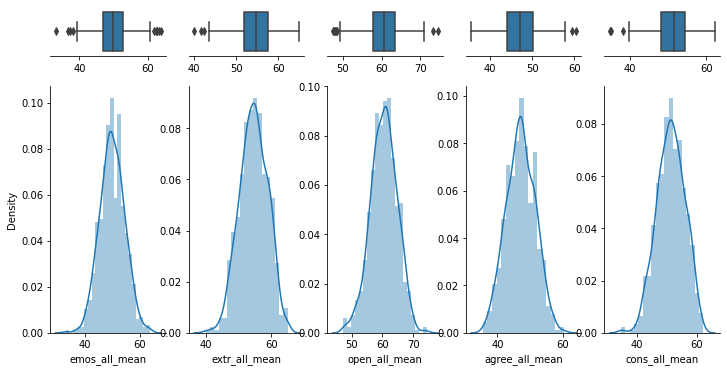

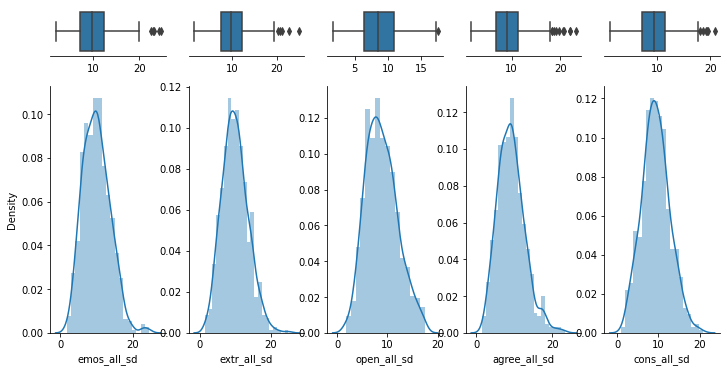

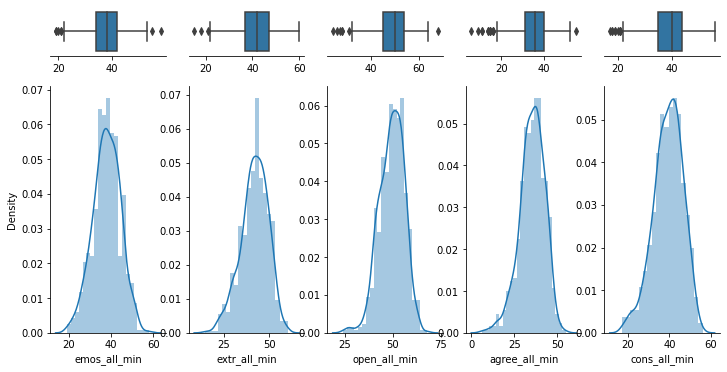

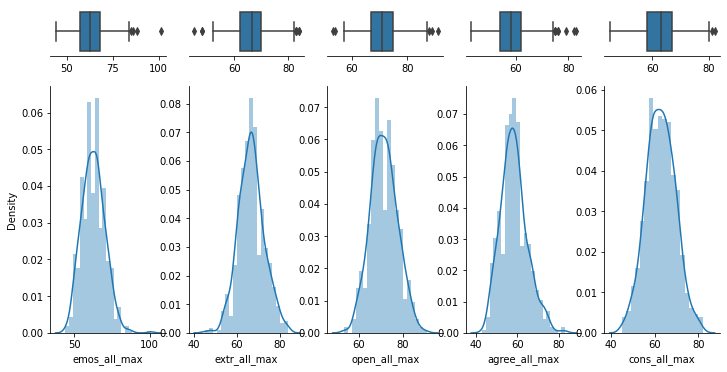

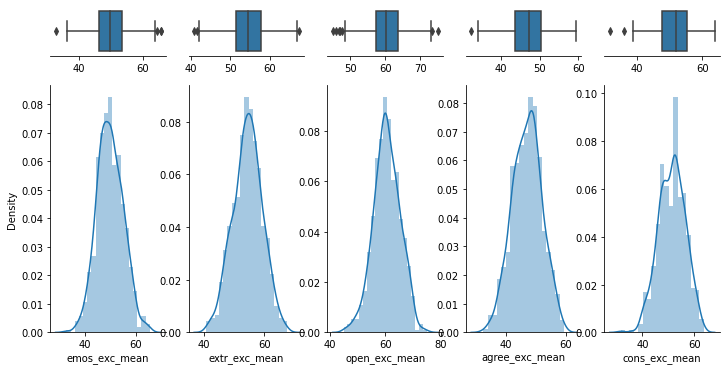

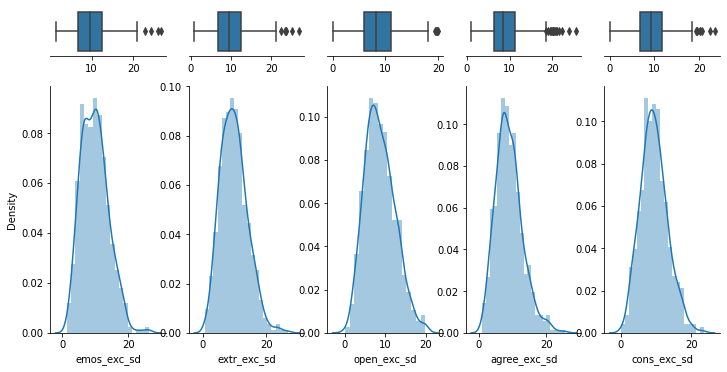

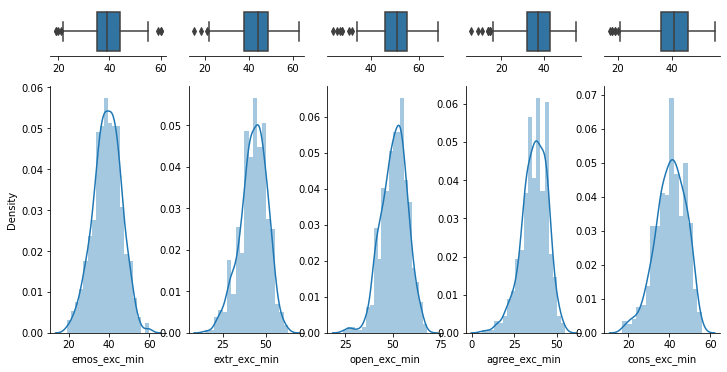

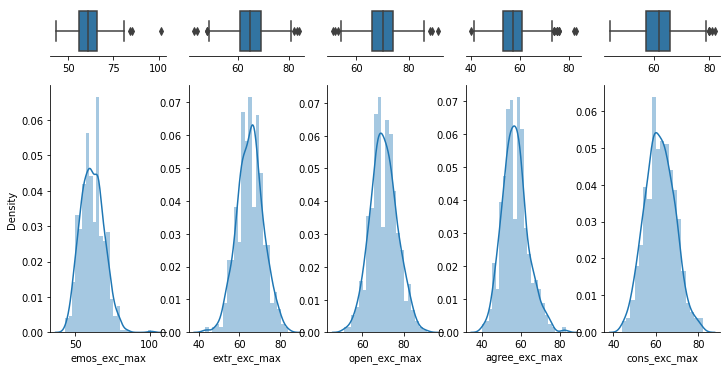

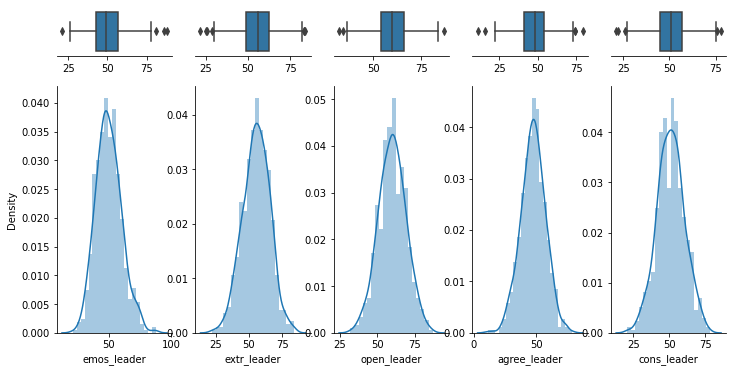

In [37]:
var_set=[range(1,6),range(6,11),range(11,16),range(16,21),range(25,30),range(30,35),range(35,40),range(40,45),range(48,53)]

for var in var_set:
  #define subplots
  f, axs = plt.subplots(2,len(var),figsize=(12,6),gridspec_kw={'height_ratios': [1, 5]})
  k=0
  for j in var:
    x=dat1[dat1.columns[j]]
    sns.boxplot(x, ax=axs[0,k])
    sns.distplot(x, ax=axs[1,k])
    axs[0,k].set(xlabel='',yticks=[])
    if k>0 :
      axs[1,k].set(ylabel='')
    sns.despine(ax=axs[1,k])
    sns.despine(ax=axs[0,k], left=True)
    #axs[0,k].set_title(dat1.columns[j])
    k=k+1


### Mean variables

In [ ]:
x=dat1['performance']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

# Replicating common findings in the literature
## Summary of findings in the literature (based on 3 review papers)
* Peeters et al (2006): 
  + Extraversion: no relationship
  + Agreeableness: mean positively related to performance
  + Conscientiousness: (a) mean positively related to performance but the effect disappears in student teams (disappers whhen project periods are short); (b) variance negatively related to performance. 
  + Emotional stability: (a) mean; and (b) variance negatively related to performance for student teams (weak relationship).
  + Openness to experience: no effect.

* Prewett et al (2008):
  + Hypotheses:
    - Conscientiousness, Agreeableness & Emotional Stability: (a) mean; (b) minimum will positively relate to performance; (c) variance will negatively relate to performance.
    - Extraversion: (a) min will negatively relate to performance; (b) variance will positively relate performance.

  + Findings:
    - Conscientiousness: mean and min positively correlated with performance (the "weak link" metaphor).
    - Extraversion: mean and max strongly correlated with performance; variance weakly correlated.
    - Agreeableness: mean and min positively correlated with performance; variance negatively correlated.
    - Emotional Stability: mean and max strongly correlated with performance.

* Carter et al (2019): 
  + Agreeableness, emotional stability, extraversion and openness to experience: mean positively correlated with performance; variance does not have any significant relationships. 


## Using Data 1

### Running linear regression with one single personality trait variable as predictor

In [ ]:
#define response variable
y = dat1['performance']
#create empty result dataframe
results1_1=pd.DataFrame(columns = ['Var','Coef','p-value'])
for i in range(1,20,1):
  #define predictor variables
  x=dat1[dat1.columns[i]]
  #add constant to predictor variables
  x = sm.add_constant(x)  
  #fit linear regression model
  model = sm.OLS(y, x).fit()
  results1_1 = results1_1.append({'Var':dat1.columns[i],'Coef':model.params[1],'p-value':model.pvalues[1]},ignore_index = True)

In [86]:
results1_1

,Var,Coef,p-value
0,emos_all_mean,-1.106666,0.385189
1,extr_all_mean,1.503898,0.268217
2,open_all_mean,0.967587,0.474233
3,agree_all_mean,0.759378,0.565698
4,cons_all_mean,-2.068732,0.094960
5,emos_all_sd,2.872280,0.061830
6,extr_all_sd,-2.009657,0.203118
7,open_all_sd,-3.928706,0.032075
8,agree_all_sd,-2.049789,0.206459
9,cons_all_sd,-2.533428,0.140505


Results:
* Aggregation method: mean
  + Conscientiouness: negative correlation, significant at 10%. 
* Aggregation method: variance
  + Emotional Stability: positive correlation, significant at 10% (p-value=0.06).
  + Openness to experience: negative correlation, significant at 5% (p-value=0.03).
* Aggregation method: min
  + Oppenness to experience: positive correlation, significant at 5% (p-value=0.02).

### Running linear regressions with multiple personality trait variables

#### Including all means

In [ ]:
#define response variable
y = dat1['performance']
#define predictor variables
x=dat1[dat1.columns[1:6]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results1_2 = pd.DataFrame({'Coef':model.params[1:6],'p-value':model.pvalues[1:6]})

In [65]:
results1_2

,Var,Coef,p-value
emos_all_mean,emos_all_mean,-0.951645,0.460905
extr_all_mean,extr_all_mean,1.241438,0.364943
open_all_mean,open_all_mean,0.732595,0.595285
agree_all_mean,agree_all_mean,0.553362,0.682097
cons_all_mean,cons_all_mean,-1.724944,0.173725


Results: 
* No significant results

#### Including all variance variables 

In [68]:
#define response variable
y = dat1['performance']
#define predictor variables
x=dat1[dat1.columns[6:11]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results1_3 = pd.DataFrame({'Coef':model.params[1:6],'p-value':model.pvalues[1:6]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
results1_3

,Var,Coef,p-value
emos_all_sd,emos_all_mean,3.181019,0.038786
extr_all_sd,extr_all_mean,-2.012262,0.202183
open_all_sd,open_all_mean,-3.704919,0.043224
agree_all_sd,agree_all_mean,-1.741296,0.283105
cons_all_sd,cons_all_mean,-2.669097,0.121371


Results:
* Variance of Emotional Stability: positive correlation, significant at 5% (p-value=0.04).
* Variance of Openness to experience: negative correlation, significant at 5% (p-value=0.04).

#### Including all min

In [71]:
#define response variable
y = dat1['performance']
#define predictor variables
x=dat1[dat1.columns[11:16]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results1_4 = pd.DataFrame({'Coef':model.params[1:6],'p-value':model.pvalues[1:6]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [72]:
results1_4

,Var,Coef,p-value
emos_all_min,emos_all_mean,-1.483720,0.098223
extr_all_min,extr_all_mean,0.397113,0.606018
open_all_min,open_all_mean,1.874636,0.036937
agree_all_min,agree_all_mean,0.807850,0.308717
cons_all_min,cons_all_mean,-0.116321,0.887964


Results:
* Min of Emotional Stability: negative correlation, significant at 10% (p-value=0.098)
* Min of Openness to experience: positive correlation, significant at 5% (p-value=0.04).

#### Including all max

In [76]:
#define response variable
y = dat1['performance']
#define predictor variables
x=dat1[dat1.columns[16:21]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results1_5 = pd.DataFrame({'Coef':model.params[1:6],'p-value':model.pvalues[1:6]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [77]:
results1_5

,Var,Coef,p-value
emos_all_max,emos_all_mean,0.970707,0.199648
extr_all_max,extr_all_mean,-0.775514,0.416088
open_all_max,open_all_mean,-0.360637,0.704002
agree_all_max,agree_all_mean,-0.567651,0.531455
cons_all_max,cons_all_mean,-1.946531,0.025762


Results:
* Max of Conscientiousness: negative correlation, significant at 5% (p-value=0.03)

#### Including all means and variances

In [78]:
#define response variable
y = dat1['performance']
#define predictor variables
x=dat1[dat1.columns[1:11]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results1_6 = pd.DataFrame({'Coef':model.params[1:11],'p-value':model.pvalues[1:11]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
results1_6

,Var,Coef,p-value
emos_all_mean,emos_all_mean,-1.305549,0.315898
extr_all_mean,extr_all_mean,1.065872,0.438808
open_all_mean,open_all_mean,0.645660,0.638759
agree_all_mean,agree_all_mean,0.511173,0.705935
cons_all_mean,cons_all_mean,-1.617148,0.199566
emos_all_sd,emos_all_sd,3.391161,0.029579
extr_all_sd,extr_all_sd,-1.738160,0.276440
open_all_sd,open_all_sd,-3.704037,0.044146
agree_all_sd,agree_all_sd,-1.759489,0.282080
cons_all_sd,cons_all_sd,-2.540767,0.141862


Results:

* Variance of Emotional Stability: positive correlation, significant at 5% (p-value=0.03).
* Variance of Openness to experience: negative correlation, significant at 5% (p-value=0.04).

#### Including all means, variance, min and max

In [80]:
#define response variable
y = dat1['performance']
#define predictor variables
x=dat1[dat1.columns[1:21]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results1_7 = pd.DataFrame({'Coef':model.params[1:21],'p-value':model.pvalues[1:21]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [81]:
results1_7

,Var,Coef,p-value
emos_all_mean,emos_all_mean,-2.967884,0.283616
extr_all_mean,extr_all_mean,5.246365,0.048343
open_all_mean,open_all_mean,-2.049247,0.488334
agree_all_mean,agree_all_mean,1.586236,0.574287
cons_all_mean,cons_all_mean,-0.853409,0.764337
emos_all_sd,emos_all_sd,1.429812,0.826569
extr_all_sd,extr_all_sd,-7.273403,0.269191
open_all_sd,open_all_sd,-1.276171,0.869993
agree_all_sd,agree_all_sd,4.121216,0.606363
cons_all_sd,cons_all_sd,-8.068733,0.259703


Results:

* Mean of Extraversion: positive correlation, significant at 5% (p-value=0.0483)

## Using Data 2

### Running linear regression with one single personality trait variable as predictor

In [82]:
#define response variable
y = dat2['performance']
#create empty result dataframe
results2_1=pd.DataFrame(columns = ['Var','Coef','p-value'])
for i in range(1,20,1):
  #define predictor variables
  x=dat2[dat2.columns[i]]
  #add constant to predictor variables
  x = sm.add_constant(x)  
  #fit linear regression model
  model = sm.OLS(y, x).fit()
  results2_1 = results2_1.append({'Var':dat2.columns[i],'Coef':model.params[1],'p-value':model.pvalues[1]},ignore_index = True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

In [83]:
results2_1

,Var,Coef,p-value
0,neur_all_mean,-2.973272,0.231684
1,extr_all_mean,-0.077543,0.971604
2,open_all_mean,3.994989,0.209643
3,agree_all_mean,-1.558127,0.575306
4,cons_all_mean,-0.881569,0.767161
5,neur_all_sd,-3.987107,0.233573
6,extr_all_sd,0.138792,0.963981
7,open_all_sd,-5.305839,0.211034
8,agree_all_sd,0.405995,0.903469
9,cons_all_sd,1.245451,0.731986


Results:

* No significant results

### Running linear regressions with multiple personality trait variables

#### Including all means

In [84]:
#define response variable
y = dat2['performance']
#define predictor variables
x=dat2[dat2.columns[1:6]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results2_2 = pd.DataFrame({'Coef':model.params[1:6],'p-value':model.pvalues[1:6]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
results2_2

,Var,Coef,p-value
neur_all_mean,neur_all_mean,-3.159522,0.221327
extr_all_mean,extr_all_mean,-1.016903,0.655592
open_all_mean,open_all_mean,3.963461,0.231940
agree_all_mean,agree_all_mean,-2.443554,0.403938
cons_all_mean,cons_all_mean,-1.295917,0.667037


Results:

* No significant results

#### Including all variances

In [87]:
#define response variable
y = dat2['performance']
#define predictor variables
x=dat2[dat2.columns[6:11]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results2_3 = pd.DataFrame({'Coef':model.params[1:6],'p-value':model.pvalues[1:6]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [88]:
results2_3

,Coef,p-value
neur_all_sd,-4.135351,0.227884
extr_all_sd,-0.101742,0.974118
open_all_sd,-5.201999,0.226595
agree_all_sd,1.273006,0.710360
cons_all_sd,1.314289,0.723992


Results:

* No significant results

#### Including all min

In [89]:
#define response variable
y = dat2['performance']
#define predictor variables
x=dat2[dat2.columns[11:16]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results2_4 = pd.DataFrame({'Coef':model.params[1:6],'p-value':model.pvalues[1:6]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [90]:
results2_4

,Coef,p-value
neur_all_min,1.526893,0.570968
extr_all_min,-0.425221,0.773033
open_all_min,3.140480,0.117199
agree_all_min,-1.421487,0.404771
cons_all_min,-0.539178,0.718237


Results:

* No significant results

#### Including all max

In [92]:
#define response variable
y = dat2['performance']
#define predictor variables
x=dat2[dat2.columns[16:21]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results2_5 = pd.DataFrame({'Coef':model.params[1:6],'p-value':model.pvalues[1:6]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [93]:
results2_5

,Coef,p-value
neur_all_max,-1.254459,0.399362
extr_all_max,0.170378,0.941783
open_all_max,3.182223,0.289073
agree_all_max,0.155532,0.947999
cons_all_max,0.161697,0.964946


Results:

* No significant results

#### Including all means and variances

In [94]:
#define response variable
y = dat2['performance']
#define predictor variables
x=dat2[dat2.columns[1:11]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results2_6 = pd.DataFrame({'Coef':model.params[1:11],'p-value':model.pvalues[1:11]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [95]:
results2_6

,Coef,p-value
neur_all_mean,-2.028174,0.498322
extr_all_mean,-0.885136,0.715521
open_all_mean,3.410037,0.335068
agree_all_mean,-1.735515,0.576027
cons_all_mean,-1.185830,0.762536
neur_all_sd,-3.018123,0.426129
extr_all_sd,0.102033,0.975734
open_all_sd,-3.071120,0.513069
agree_all_sd,1.188872,0.738868
cons_all_sd,0.091851,0.984928


Results:

* No significant results

#### Including all means, variance, min and max

In [96]:
#define response variable
y = dat2['performance']
#define predictor variables
x=dat2[dat2.columns[1:21]]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit()
results2_7 = pd.DataFrame({'Coef':model.params[1:21],'p-value':model.pvalues[1:21]})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
results2_7

,Coef,p-value
neur_all_mean,-9.272868,0.095912
extr_all_mean,-3.066477,0.524535
open_all_mean,-4.803091,0.562022
agree_all_mean,0.081264,0.989027
cons_all_mean,-5.753458,0.389606
neur_all_sd,-10.188686,0.459536
extr_all_sd,12.104275,0.357539
open_all_sd,-43.931347,0.019209
agree_all_sd,-8.099360,0.525337
cons_all_sd,3.991949,0.794544


Results:

* Mean of Neuroticism: negative correlation, significant at 10% (p-value=0.096).
* Variance of Openness to experience: negative correlation, significant at 5% (p-value=0.02).
* Max of Openness to experience: positive correlation, significant at 1% (p-value=0.009).

# Algorithm-Supported Induction - Only Using Data 1

## Stage 0: Understanding variables